In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
salary_data = pd.read_csv('Salary_Data.csv')


In [3]:
salary_data.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
# check null values, datatypes
salary_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
# mean, min, max etc.
salary_data.describe()


,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
salary_data.shape


(30, 2)

In [7]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [8]:
#create train test
X = salary_data['YearsExperience']
y = salary_data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

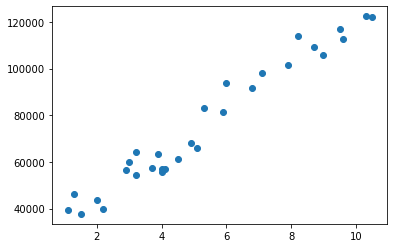

In [9]:
plt.scatter(X,y)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

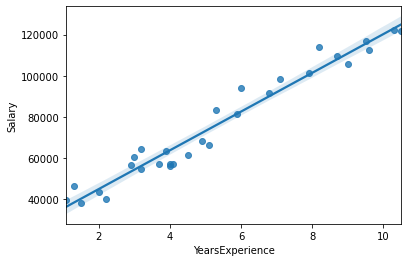

In [10]:
sns.regplot(x=X,y=y,data=salary_data)

<AxesSubplot:>

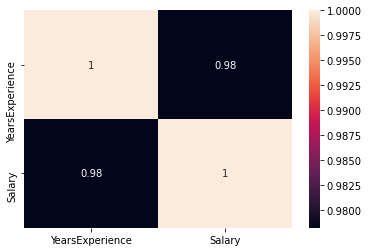

In [11]:
sns.heatmap(salary_data.corr(), annot=True)


In [12]:
from sklearn.linear_model import LinearRegression


In [13]:
print(X_train.shape)
print(X_test.shape)


(21,)
(9,)


In [14]:
X_train_lm = X_train.values.reshape(-1,1)
X_test_lm = X_test.values.reshape(-1,1)

In [16]:
lm = LinearRegression()


In [17]:
lm.fit(X_train_lm, y_train)

LinearRegression()

In [18]:
print(lm.coef_)
print(lm.intercept_)

[9731.20383825]
25202.887786154897


In [19]:
#predict
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)


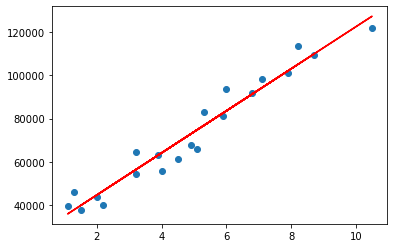

In [20]:
#train set
plt.scatter(X_train, y_train)
plt.plot(X_train_lm, y_train_pred, 'r')


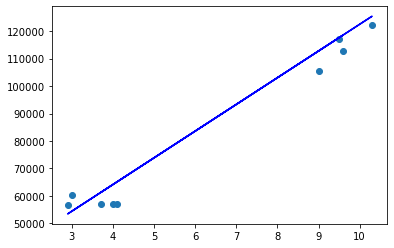

In [21]:
#test set
plt.scatter(X_test, y_test)
plt.plot(X_test_lm, y_test_pred, 'b')

In [22]:
from sklearn.metrics import r2_score


In [23]:
print(r2_score(y_true = y_train, y_pred = y_train_pred))
print(r2_score(y_true = y_test, y_pred = y_test_pred))

0.9489148127897334
0.9627668685473267


In [24]:
m = lm.coef_
c = lm.intercept_

#for 5 years of experience
print(c + m * 5)

#for 1 years of experience
print(c + m * 1)

#for 2.5 years of experience
print(c + m * 2.5)

#for 0 years of experience
print(c + m * 0)

[73858.90697738]
[34934.0916244]
[49530.89738177]
[25202.88778615]


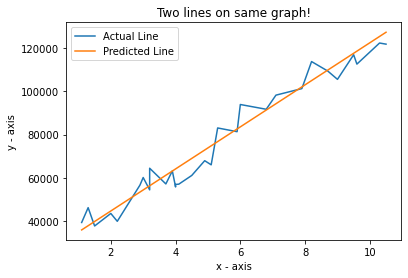

In [25]:
y_pred = lm.predict(X.values.reshape(-1,1))

plt.plot(X, y, label = "Actual Line")
plt.plot(X, y_pred, label = "Predicted Line")

plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Two lines on same graph!')
plt.legend()
plt.show()


In [26]:
import statsmodels.api as sm

X_sm = sm.add_constant(X)
olm = sm.OLS(y, X_sm)                                   
olm = olm.fit()
olm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 18 Oct 2021   Prob (F-statistic):           1.14e-20
Time:                        10:02:34   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""